In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
import keras.backend as K
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(suppress=True)
%matplotlib inline

Pixiedust database opened successfully


/home/chyld/.local/apps/miniconda3/envs/gamma/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('cars_multivariate.csv')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64

In [6]:
df.horsepower.fillna(df.horsepower.mean(), inplace=True)

In [7]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64

In [8]:
y = df.mpg
y.head(3)

0    18.0
1    15.0
2    18.0
Name: mpg, dtype: float64

In [9]:
X = df.drop(['mpg', 'car_name', 'origin'], axis=1)
X.head(3)

,cylinders,displacement,horsepower,weight,acceleration,model
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70


In [10]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
X[:3]

array([[1.        , 0.61757106, 0.45652174, 0.5361497 , 0.23809524,
        0.        ],
       [1.        , 0.72868217, 0.64673913, 0.58973632, 0.20833333,
        0.        ],
       [1.        , 0.64599483, 0.56521739, 0.51686986, 0.17857143,
        0.        ]])

In [11]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [12]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(6,), name='L1'))
model.add(Dense(units=8, activation='relu', name='L2'))
model.add(Dense(units=1, activation='linear', name='L3'))

opt = optimizers.RMSprop(lr=0.001)
model.compile(loss='mse', optimizer=opt, metrics=['mse', r2_keras])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 16)                112       
_________________________________________________________________
L2 (Dense)                   (None, 8)                 136       
_________________________________________________________________
L3 (Dense)                   (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X, y, epochs=300, batch_size=25, verbose=0, validation_split=0.3, shuffle=True)

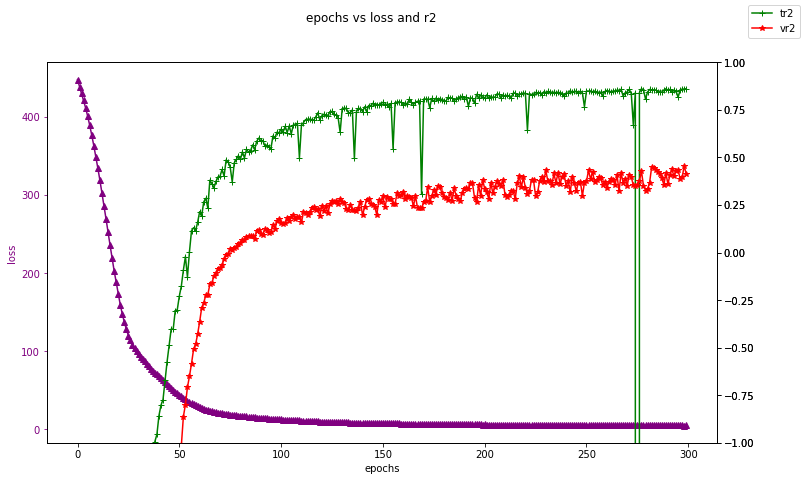

In [14]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['r2_keras'], marker='+', color='green', label='tr2')
ax2.set_ylim(-1,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_r2_keras'], marker='*', color='red', label='vr2')
ax3.set_ylim(-1,1)

fig.suptitle('epochs vs loss and r2');
fig.legend();